In [81]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Monthly, units, Daily, Stations
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
import scipy.stats as st
import time
import requests
from scipy.stats import linregress
from time import mktime
from pytz import utc, timezone
import webbrowser
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.seasonal import DecomposeResult

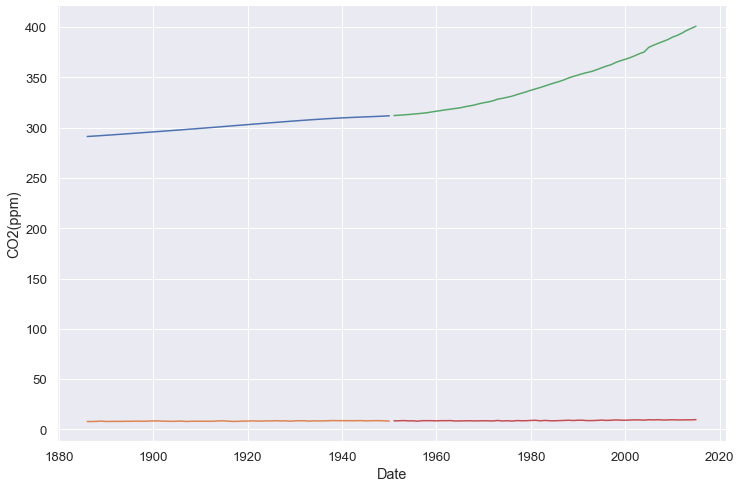

In [82]:
df_x = pd.read_csv('x_data.csv', parse_dates = ['Year'], index_col = ['Year'])
df_x = df_x.drop(columns = "Unnamed: 0")
df_y = pd.read_csv('y_data.csv', parse_dates = ['Year'], index_col = ['Year'])
df_y = df_y.drop(columns = "Unnamed: 0")
plt.xlabel('Date')
plt.ylabel('CO2(ppm)')
plt.plot(df_x)
plt.plot(df_y)

In [83]:
df_x_ppm = df_x["CO2(ppm)"]
df_y_ppm = df_y["CO2(ppm)"]
df_x_temp = df_x["Temp"]
df_y_temp = df_y["Temp"]

In [84]:
df_x_ppm

Year
1886-01-01    291.33
1887-01-01    291.62
1888-01-01    291.92
1889-01-01    292.23
1890-01-01    292.55
               ...  
1946-01-01    311.02
1947-01-01    311.22
1948-01-01    311.42
1949-01-01    311.65
1950-01-01    311.89
Name: CO2(ppm), Length: 65, dtype: float64

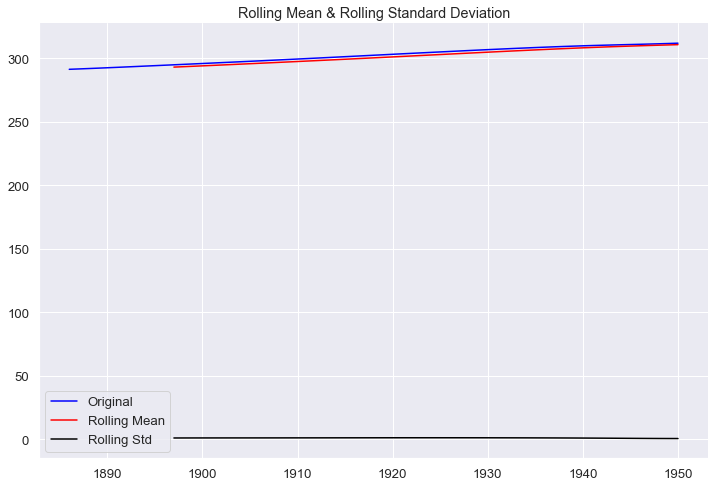

In [85]:
rolling_mean = df_x_ppm.rolling(window = 12).mean()
rolling_std = df_x_ppm.rolling(window = 12).std()
plt.plot(df_x_ppm, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [86]:
result = adfuller(df_x_ppm)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.6506961321468945
p-value: 0.8591105174527285
Critical Values:
	1%: -3.552928203580539
	5%: -2.9147306250000002
	10%: -2.595137155612245


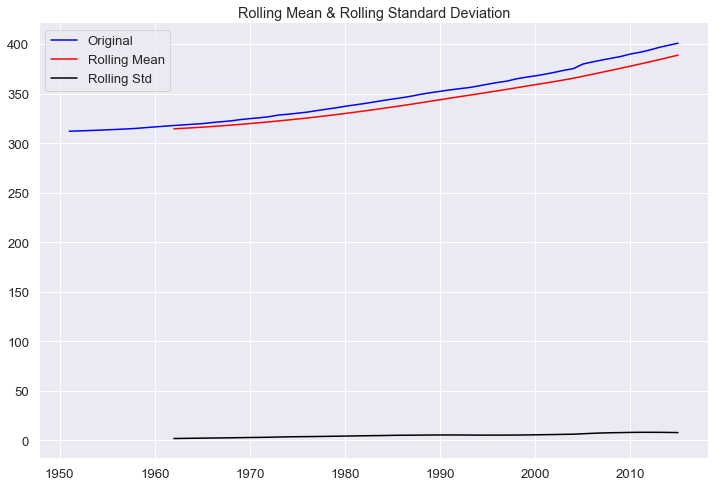

In [87]:
rolling_mean = df_y_ppm.rolling(window = 12).mean()
rolling_std = df_y_ppm.rolling(window = 12).std()
plt.plot(df_y_ppm, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [88]:
result = adfuller(df_x_temp)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.4537233360481019
p-value: 0.5562670552011789
Critical Values:
	1%: -3.542412746661615
	5%: -2.910236235808284
	10%: -2.5927445767266866


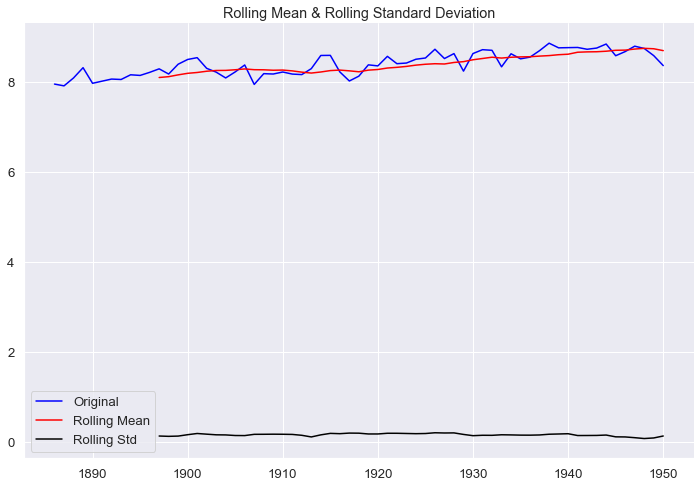

In [89]:
rolling_mean = df_x_temp.rolling(window = 12).mean()
rolling_std = df_x_temp.rolling(window = 12).std()
plt.plot(df_x_temp, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [90]:
result = adfuller(df_y_ppm)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 10.14466476523793
p-value: 1.0
Critical Values:
	1%: -3.53692771987915
	5%: -2.907887369384766
	10%: -2.591493291015625


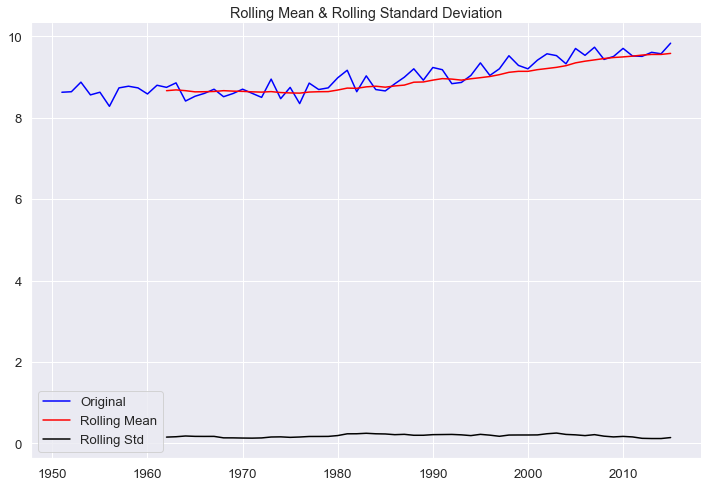

In [91]:
rolling_mean = df_y_temp.rolling(window = 12).mean()
rolling_std = df_y_temp.rolling(window = 12).std()
plt.plot(df_y_temp, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [92]:
result = adfuller(df_y_temp)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.2538337020203503
p-value: 0.9963375134422887
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997


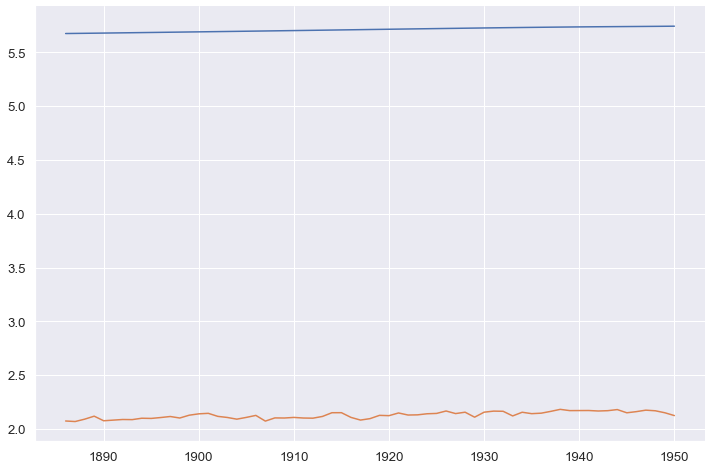

In [93]:
dfx_log = np.log(df_x)
plt.plot(dfx_log);

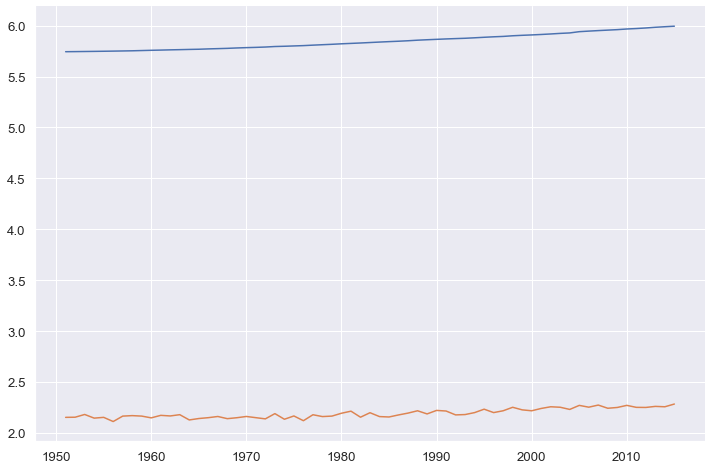

In [94]:
dfy_log = np.log(df_y)
plt.plot(dfy_log);

In [95]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['CO2(ppm)'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

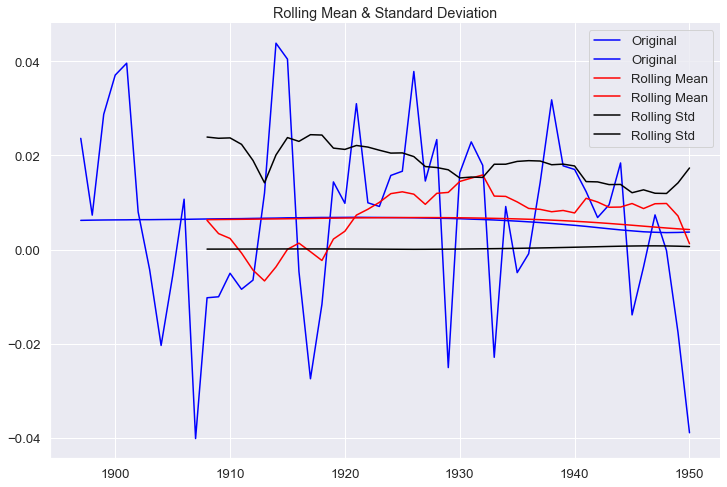

ADF Statistic: -6.8032663946933765
p-value: 2.2092954611894024e-09
Critical Values:
	1%: -3.5656240522121956
	5%: -2.920142229157715
	10%: -2.598014675124952


In [96]:
rolling_mean = dfx_log.rolling(window=12).mean()
dfx_log_minus_mean = dfx_log - rolling_mean
dfx_log_minus_mean.dropna(inplace=True)
get_stationarity(dfx_log_minus_mean)

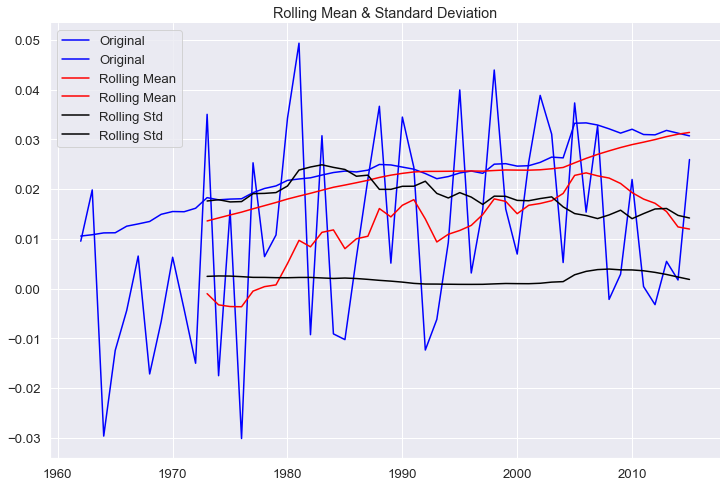

ADF Statistic: -1.4644779104327024
p-value: 0.551004760294433
Critical Values:
	1%: -3.560242358792829
	5%: -2.9178502070837
	10%: -2.5967964150943397


In [97]:
rolling_mean = dfy_log.rolling(window=12).mean()
dfy_log_minus_mean = dfy_log - rolling_mean
dfy_log_minus_mean.dropna(inplace=True)
get_stationarity(dfy_log_minus_mean)

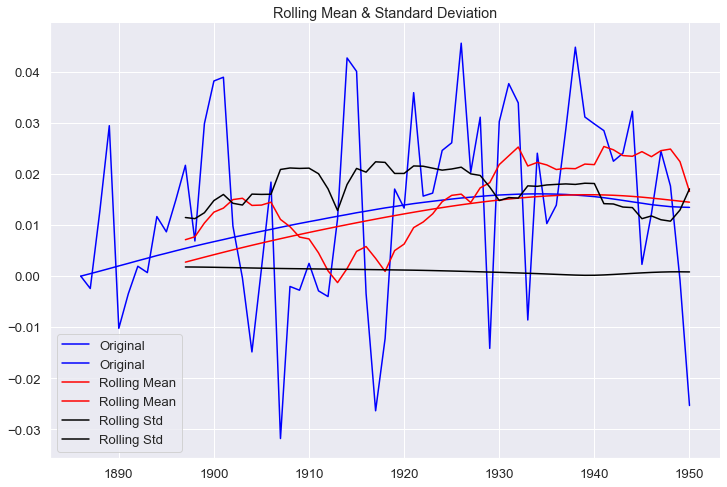

ADF Statistic: -2.287596888317866
p-value: 0.17599943061631518
Critical Values:
	1%: -3.552928203580539
	5%: -2.9147306250000002
	10%: -2.595137155612245


In [98]:
rolling_mean_exp_decay = dfx_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
dfx_log_exp_decay = dfx_log - rolling_mean_exp_decay
dfx_log_exp_decay.dropna(inplace=True)
get_stationarity(dfx_log_exp_decay)

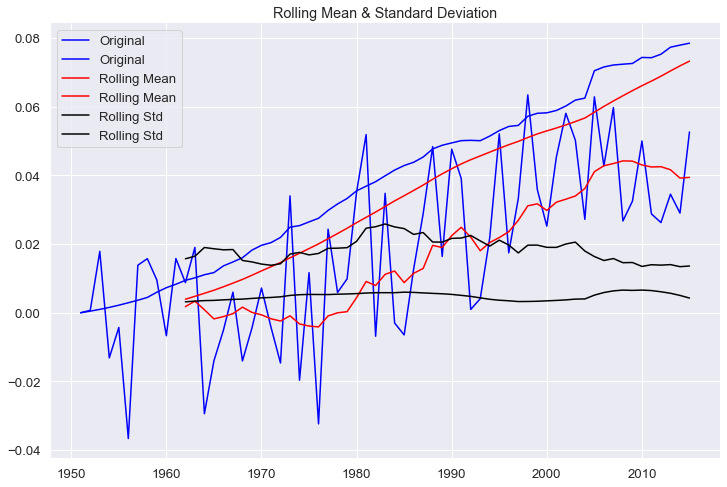

ADF Statistic: 0.2860032791206348
p-value: 0.9766931331520498
Critical Values:
	1%: -3.53692771987915
	5%: -2.907887369384766
	10%: -2.591493291015625


In [99]:
rolling_mean_exp_decay = dfy_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
dfy_log_exp_decay = dfy_log - rolling_mean_exp_decay
dfy_log_exp_decay.dropna(inplace=True)
get_stationarity(dfy_log_exp_decay)

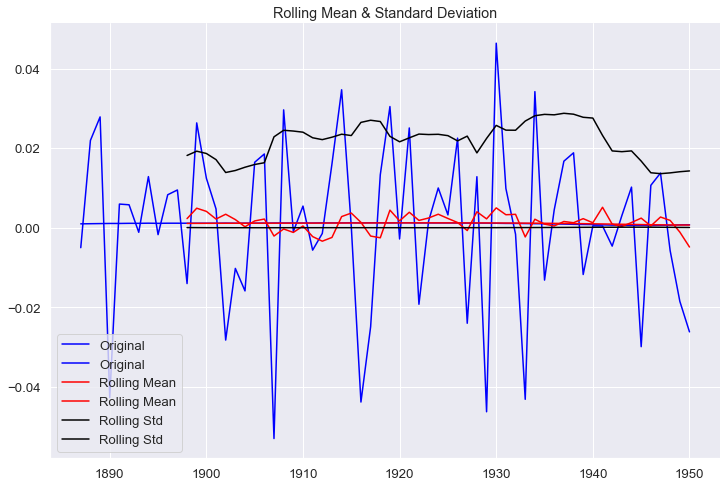

ADF Statistic: -2.276170356581791
p-value: 0.17976870973198583
Critical Values:
	1%: -3.552928203580539
	5%: -2.9147306250000002
	10%: -2.595137155612245


In [100]:
dfx_log_shift = dfx_log - dfx_log.shift()
dfx_log_shift.dropna(inplace=True)
get_stationarity(dfx_log_shift)

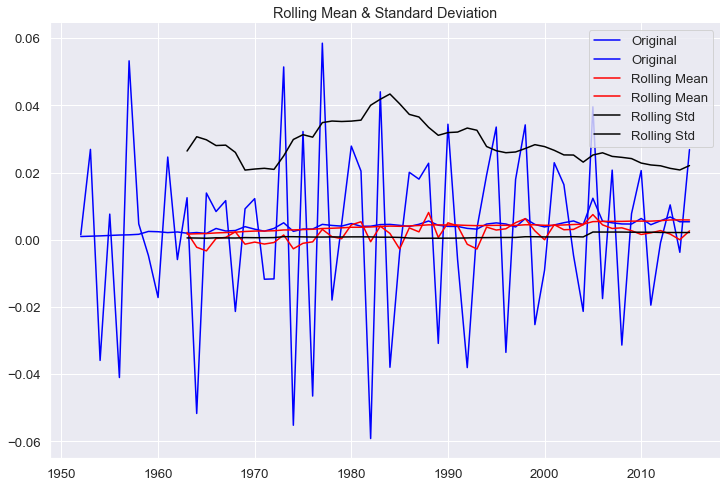

ADF Statistic: -1.6744814305832214
p-value: 0.4443060371712261
Critical Values:
	1%: -3.5506699942762414
	5%: -2.913766394626147
	10%: -2.5946240473991997


In [101]:
dfy_log_shift = dfy_log - dfy_log.shift()
dfy_log_shift.dropna(inplace=True)
get_stationarity(dfy_log_shift)

In [130]:
decomposition = seasonal_decompose(dfx_log.index)
model = ARIMA(dfx_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(dfx_log_shift)
plt.plot(results.fittedvalues, color='red')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [121]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dfx_log['CO2(ppm)'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_x)
plt.plot(predictions_ARIMA)

NameError: name 'results' is not defined

In [122]:
results.plot_predict(1,264)

NameError: name 'results' is not defined